In [19]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import scipy.stats as stats



In [3]:
# Mean and covariance
mu = np.array([0.14, 0.07, 0.16])
Sigma = np.array([
    [0.0625, -0.01, 0.0375],
    [-0.01, 0.01, -0.015],
    [0.0375, -0.015, 0.09]
])

n_samples = 10_000
returns = np.random.multivariate_normal(mu, Sigma, size=n_samples)

# Compute the total return (average of all 3 investments per sample)
total_returns = returns.mean(axis=1)  # axis=1 → average across columns (investments)


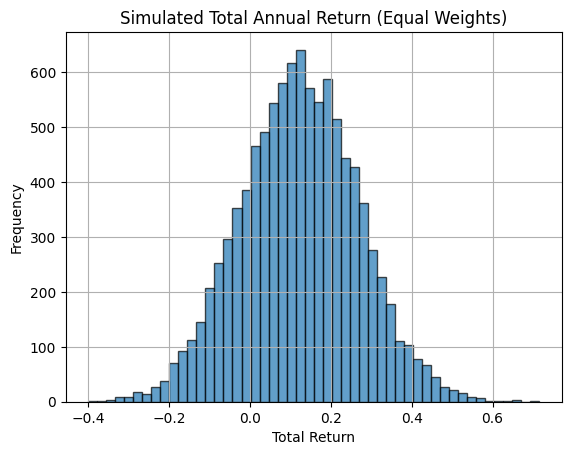

Estimated mean total return: 0.1225
Estimated standard deviation: 0.1452


In [4]:

# Plot histogram
plt.hist(total_returns, bins=50, edgecolor='k', alpha=0.7)
plt.title('Simulated Total Annual Return (Equal Weights)')
plt.xlabel('Total Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print basic statistics
print(f"Estimated mean total return: {np.mean(total_returns):.4f}")
print(f"Estimated standard deviation: {np.std(total_returns):.4f}")


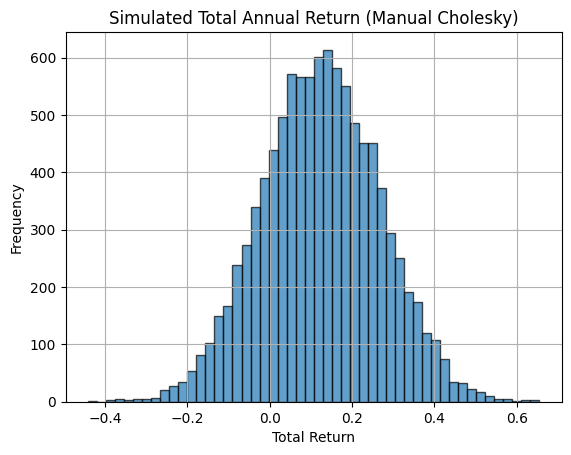

Estimated mean total return: 0.1234
Estimated std deviation: 0.1435


In [5]:
# Step 2: Cholesky decomposition
L = np.linalg.cholesky(Sigma)

# Step 3: Generate standard normal samples (Z ~ N(0, I))
n_samples = 10_000
Z = np.random.randn(n_samples, 3)  # shape (10000, 3)

# Step 4: Transform to correlated samples
X = mu + Z @ L.T  # shape (10000, 3)

# Step 5: Compute total (average) return per sample
total_returns = X.mean(axis=1)

# Step 6: Plot histogram
plt.hist(total_returns, bins=50, edgecolor='k', alpha=0.7)
plt.title('Simulated Total Annual Return (Manual Cholesky)')
plt.xlabel('Total Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 7: Print statistics
print(f"Estimated mean total return: {np.mean(total_returns):.4f}")
print(f"Estimated std deviation: {np.std(total_returns):.4f}")

## Confidante interval

In [6]:
# Compute the 95% confidence interval for the mean
mean_return = np.mean(total_returns)
std_return = np.std(total_returns, ddof=1)  # sample std dev
n = len(total_returns)

# z-value for 95% confidence
z = 1.96

# Margin of error
margin = z * std_return / np.sqrt(n)

# Confidence interval
ci_lower = mean_return - margin
ci_upper = mean_return + margin

print(f"95% Confidence Interval for the mean total return: ({ci_lower:.4f}, {ci_upper:.4f})")


95% Confidence Interval for the mean total return: (0.1206, 0.1262)


## C
* $P(X_1 > 0 & X_2 > 0 & X_3 > 0) 
* Given X_1 ,X_2 and X_3 are independent

In [7]:
mu = np.array([0.14, 0.07, 0.16])
Sigma = np.array([
    [0.0625, -0.01, 0.0375],
    [-0.01, 0.01, -0.015],
    [0.0375, -0.015, 0.09]
])
p_x_1 = 1 - norm.cdf(0, loc=mu[0], scale=Sigma[0, 0])
p_x_2 = 1 - norm.cdf(0, loc=mu[1], scale=Sigma[1, 1])
p_x_3 = 1 - norm.cdf(0, loc=mu[2], scale=Sigma[2, 2])
print(f"Probability of x1 > 0: {p_x_1:.4f}")
print(f"Probability of x2 > 0: {p_x_2:.4f}")
print(f"Probability of x3 > 0: {p_x_3:.4f}")
# Probability of total return > 0
p_total = p_x_1 * p_x_2 * p_x_3
print(f"Probability of total return > 0: {p_total:.4f}")

Probability of x1 > 0: 0.9875
Probability of x2 > 0: 1.0000
Probability of x3 > 0: 0.9623
Probability of total return > 0: 0.9502


## D
* Simulate E[X_1] given X_2 < 0 and X_3 < 0

In [11]:
returns = np.random.multivariate_normal(mu, Sigma, size=n_samples * 10)

# total_returns = returns.mean(axis=1)  # axis=1 → average across columns (investments)
vals = []
for val in returns:
    if val[1] > 0 and val[2] > 0:
        vals.append(val[0])
    



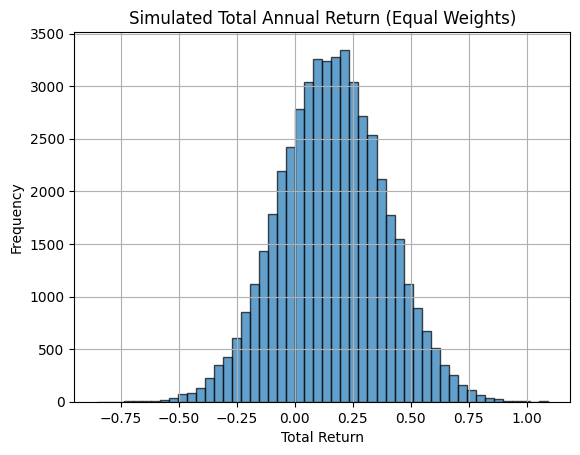

In [14]:
# plot the vals histogram
plt.hist(vals, bins=50, edgecolor='k', alpha=0.7)
plt.title('Simulated Total Annual Return (Equal Weights)')
plt.xlabel('Total Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [16]:
avg = np.mean(vals, axis=0)
print(f"Estimated mean total return: {avg}, total returns: {len(vals):,}")

Estimated mean total return: 0.16175462962178136, total returns: 48,651


## D
* Read the investment1.csv file

In [17]:
import numpy as np
import pandas as pd

# Step 1: Load data
data = pd.read_csv('investment1.csv')  # make sure the file is in the same folder
returns = data.iloc[:, 0].values  # assuming the returns are in the first column

# Step 2: Calculate MLE estimates
mu_mle = np.mean(returns)
sigma_mle = np.std(returns, ddof=0)  # ddof=0 gives MLE estimate (not unbiased)

# Step 3: Print the results
print(f"MLE Estimate of Mean (μ): {mu_mle:.4f}")
print(f"MLE Estimate of Std Dev (σ): {sigma_mle:.4f}")


MLE Estimate of Mean (μ): 0.3762
MLE Estimate of Std Dev (σ): 0.3281


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


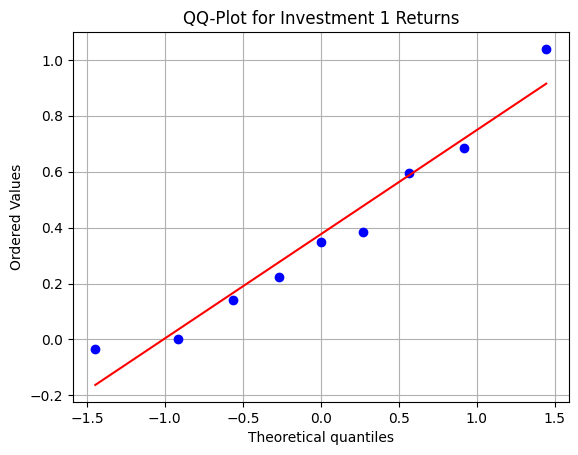

In [20]:

# Step 1: Load data
data = pd.read_csv('investment1.csv')  # replace with full path if needed
returns = data.iloc[:, 0].values

# Step 2: Generate QQ-plot
stats.probplot(returns, dist="norm", plot=plt)
plt.title("QQ-Plot for Investment 1 Returns")
plt.grid(True)
plt.show()
